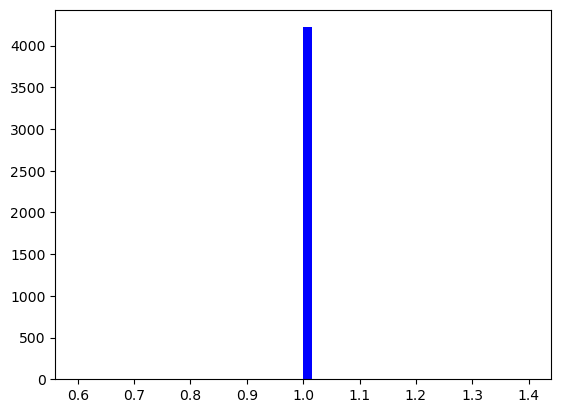

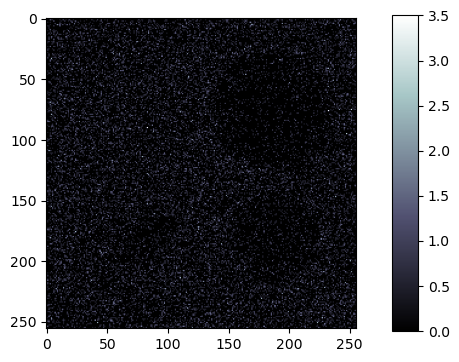

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.ndimage import rotate
#import cv2
from PIL import Image
from scipy.ndimage import zoom

nameG="D"
nameO="RAW"+nameG
nameP="Simulaciones"
nameI="G4MProc"
nameE="TestAng"
nameV=20
nameS="PData"
#name0=nameP+"/"+nameI+"/"+nameE+"/"+str(nameV)+"/"
name0= "D"
PDith=4
Npixeles=256
NThr=1
z_FS=0.6
z_SD=0.6
z_FD=z_FS+z_SD
M=z_FD/z_FS
a=10*(10**(-6))
W=55*(10**(-6))
E=nameV*(10**(3))
E_J=E*1.6*(10**(-19))
h=6.63*10**(-34)
c=3*(10**(8))
k=(2*np.pi*E_J)/(h*c)
o=k/z_SD

def PI(name,inicial,final,h,y):
    P=np.zeros(y-h)
    for i in range(inicial,final):
        P=P+name[i,h:y]
    mean=P/(final-inicial)
    return mean

def Wiener2(name,W,Dx,vo,n,s):
    frr = np.fft.fftshift(np.fft.fft2(name))
    u=np.fft.fftshift(np.fft.fftfreq(name.shape[1], 2*W))
    v=np.fft.fftshift(np.fft.fftfreq(name.shape[0], W))
    uu, vv = np.meshgrid(u, v)
    SNR=s/(1+(vv/vo)**(2*n))
    D=-2j*np.sin(2*np.pi*Dx*uu)
    Dc=np.conj(D)
    DFrq=Dc/(D**2+(1/SNR))
    A=frr*DFrq
    A2=(np.fft.ifft2(np.fft.ifftshift(A)).real)*Dx
    return A2

Dith=[]
for i in range(1,PDith+1):
    #RAW=np.genfromtxt(name0+"Dt{}/".format(i)+nameS+"/"+nameO+".txt")
    RAW=np.genfromtxt("Txts\\" + name0+"{}".format(i)+".txt")
    Dith.append(RAW)

HtTh0=plt.hist(np.ravel(Dith[0]),bins=50,color="blue",range=(0.6,1.4))

fig, ax = plt.subplots(figsize=(5, 5))
u=ax.imshow(Dith[2], cmap="bone")
fig.colorbar(u,ax=ax,location='right', anchor=(0.5, 0.5), shrink=0.82,aspect=12)
#plt.savefig(name3+"/In-line.png", bbox_inches='tight', transparent=True, pad_inches=0,dpi=199)

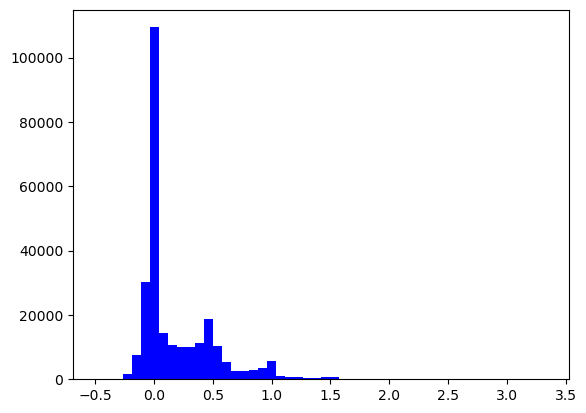

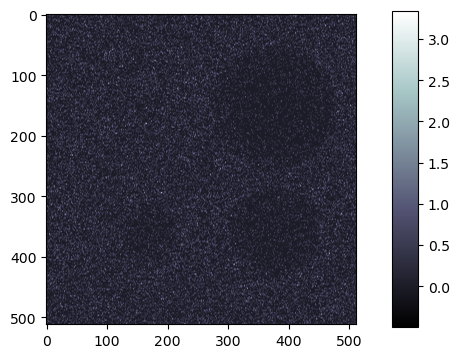

In [8]:
ImPCYY=[]
ImPCYA=[]
AbsYY=[]
PhaseDYY=[]
for i in range(PDith):
    ImPCYY.append(Dith[i][:,1::2])
    ImPCYA.append(Dith[i][:,::2])
    AbsYY.append((Dith[i][:,::2]+Dith[i][:,1::2])/2)
    PhaseDYY.append((M*a*o)/2*np.divide((Dith[i][:,1::2]-Dith[i][:,::2]), (Dith[i][:,::2]+Dith[i][:,1::2]), out = np.zeros_like(Dith[i][:,::2]), where = (Dith[i][:,::2]+Dith[i][:,1::2]) != 0))

ImPCODith=np.zeros((Npixeles,PDith*int(Npixeles/2)))
ImPCEDith=np.zeros((Npixeles,PDith*int(Npixeles/2)))
AbsDith=np.zeros((Npixeles,PDith*int(Npixeles/2)))
PhaseDDith=np.zeros((Npixeles,PDith*int(Npixeles/2)))
for i in range(PDith):
    for j in range(int(Npixeles/2)):
        ImPCODith[:,PDith*j+i:PDith*j+i+1]=ImPCYY[PDith-1-i][:,j:j+1]
        ImPCEDith[:,PDith*j+i:PDith*j+i+1]=ImPCYA[PDith-1-i][:,j:j+1]
        AbsDith[:,PDith*j+i:PDith*j+i+1]=AbsYY[PDith-1-i][:,j:j+1]
        PhaseDDith[:,PDith*j+i:PDith*j+i+1]=PhaseDYY[PDith-1-i][:,j:j+1]
Factor = ImPCODith.shape[1] / ImPCODith.shape[0]
ImPCODithS= zoom(ImPCODith, (Factor, 1))
ImPCEDithS= zoom(ImPCEDith, (Factor, 1))
AbsDithS= zoom(AbsDith, (Factor, 1))
PhaseDDithS= zoom(PhaseDDith, (Factor, 1))

HistPCDith=plt.hist(np.ravel(ImPCODithS),bins=50,color="blue")

fig, ax = plt.subplots(figsize=(5, 5))
u=ax.imshow(ImPCODithS, cmap="bone")
fig.colorbar(u,ax=ax,location='right', anchor=(0.5, 0.5), shrink=0.82,aspect=12)
#plt.savefig(name0+nameS+"/ImPEDith"+nameG+".png", bbox_inches='tight', transparent=True, pad_inches=0,dpi=199)

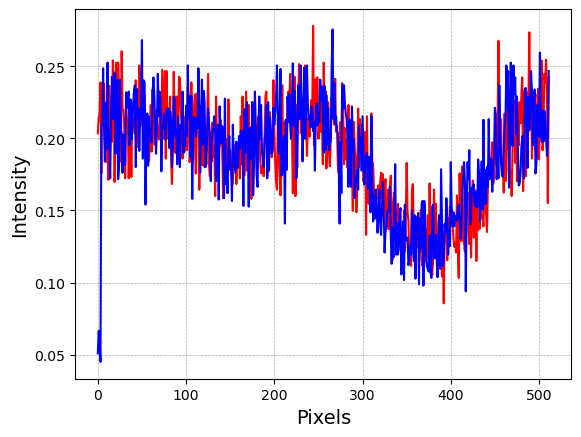

In [11]:
PIPCODith=PI(ImPCODithS,0,ImPCODithS.shape[0],0,ImPCODithS.shape[1])
PIPCEDith=PI(ImPCEDithS,0,ImPCEDithS.shape[0],0,ImPCEDithS.shape[1])

plt.plot(PIPCODith, '-', color="red", label="Odd")
plt.plot(PIPCEDith, '-', color="blue", label="Even")
plt.xlabel("Pixels",fontsize=14)
plt.ylabel("Intensity",fontsize=14)
plt.grid(linestyle = '--', linewidth = 0.5)
#plt.savefig(name0+nameS+"/PIImPDith"+nameG+".png", bbox_inches='tight', transparent=True, pad_inches=0,dpi=199)


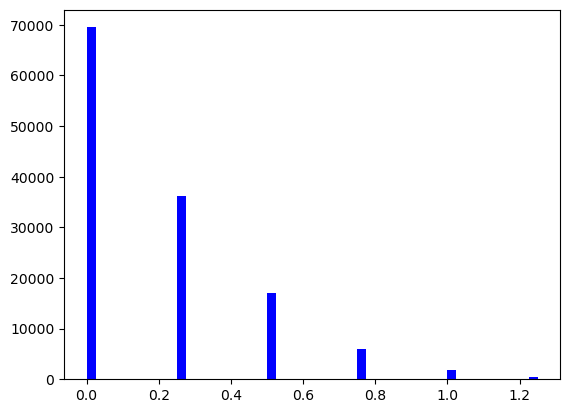

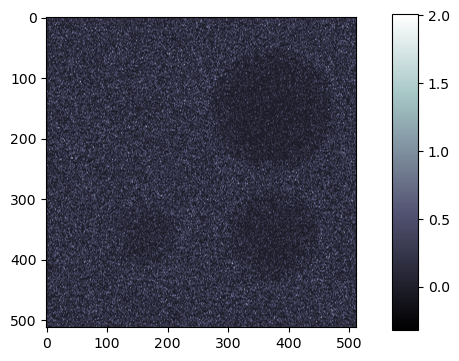

In [12]:
HistAbsDith=plt.hist(np.ravel(AbsDith),bins=50,color="blue",range=(0.,1.25))

fig, ax = plt.subplots(figsize=(5, 5))
u=ax.imshow(AbsDithS, cmap="bone")
fig.colorbar(u,ax=ax,location='right', anchor=(0.5, 0.5), shrink=0.82,aspect=12)
#plt.savefig(name0+nameS+"/AbsDith"+nameG+".png", bbox_inches='tight', transparent=True, pad_inches=0,dpi=199)

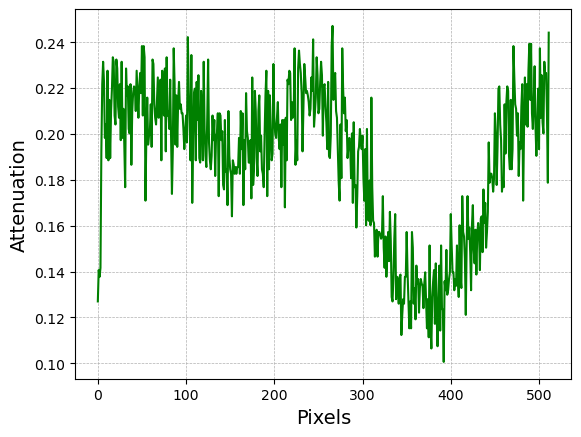

In [13]:
PIAbsDith=PI(AbsDith,0,AbsDith.shape[0],0,AbsDith.shape[1])

plt.plot(PIAbsDith, '-', color="green")
plt.xlabel("Pixels",fontsize=14)
plt.ylabel("Attenuation",fontsize=14)
#plt.ylim(-390,10)
plt.grid(linestyle = '--', linewidth = 0.5)
#plt.savefig(name0+nameS+"/PIAbsDith"+nameG+".png", bbox_inches='tight', transparent=True, pad_inches=0,dpi=199)

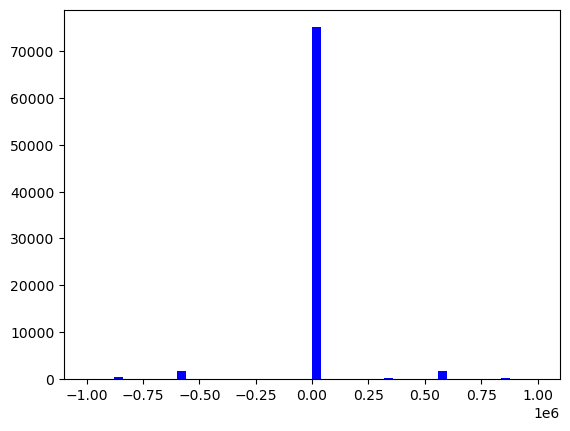

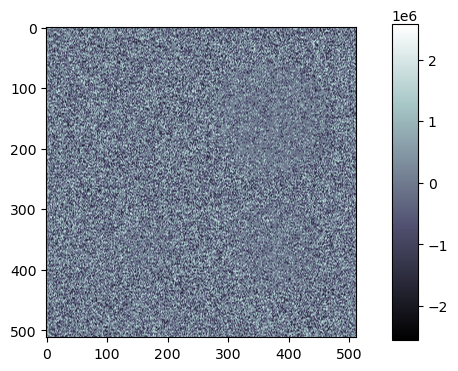

In [14]:
HistPhaseDDith=plt.hist(np.ravel(PhaseDDith),bins=50,color="blue",range=(-1e6,1e6))

fig, ax = plt.subplots(figsize=(5, 5))
u=ax.imshow(PhaseDDithS, cmap="bone")
fig.colorbar(u,ax=ax,location='right', anchor=(0.5, 0.5), shrink=0.82,aspect=12)
#plt.savefig(name0+nameS+"/PhaseDDith"+nameG+".png", bbox_inches='tight', transparent=True, pad_inches=0,dpi=199)

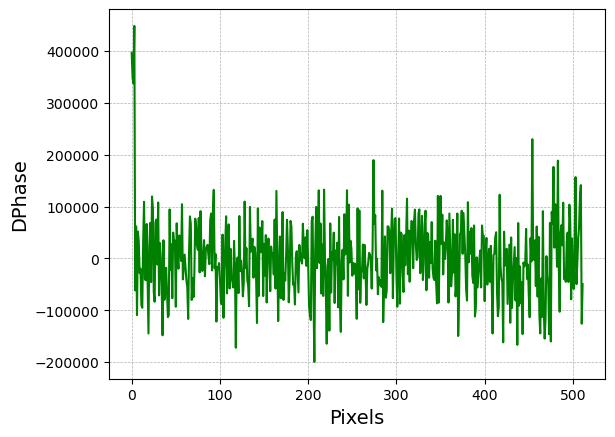

In [15]:
PIPhDDith=PI(PhaseDDith,0,PhaseDDith.shape[0],0,PhaseDDith.shape[1])

plt.plot(PIPhDDith, '-', color="green")
plt.xlabel("Pixels",fontsize=14)
plt.ylabel("DPhase",fontsize=14)
plt.grid(linestyle = '--', linewidth = 0.5)
#plt.savefig(name0+nameS+"/PIPhaseDDith"+nameG+".png", bbox_inches='tight', transparent=True, pad_inches=0,dpi=199)

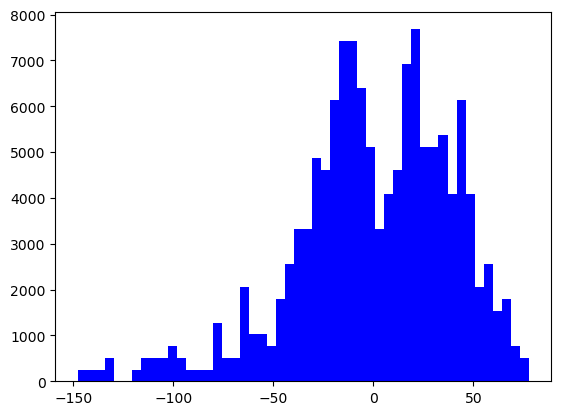

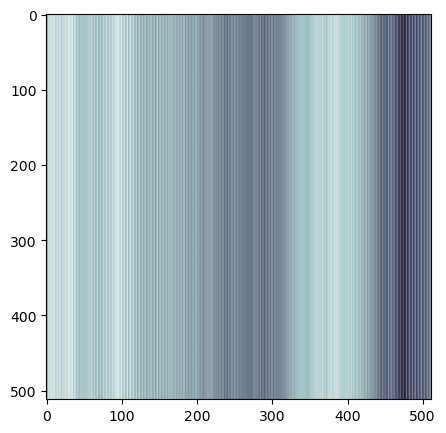

In [16]:
#vo=1*(10**(2))
#s=1*(10**(3))
#n=1
Dx=2*W
vo=6*(10**(-5))
s=2*(10**(6))
n=1
PhaseDith=Wiener2(PhaseDDith,W,Dx,vo,n,s)
PhaseDithS= zoom(PhaseDith, (Factor, 1))

HistPhaseDith=plt.hist(np.ravel(PhaseDith),bins=50,color="blue")

fig, ax = plt.subplots(figsize=(5, 5))
u=ax.imshow(PhaseDithS, cmap="bone")
#,vmin=-600,vmax=400
#plt.xticks([])
#plt.yticks([])
#plt.savefig(name0+"/PData/PhaseDDith.png", bbox_inches='tight', transparent=True, pad_inches=0,dpi=199)

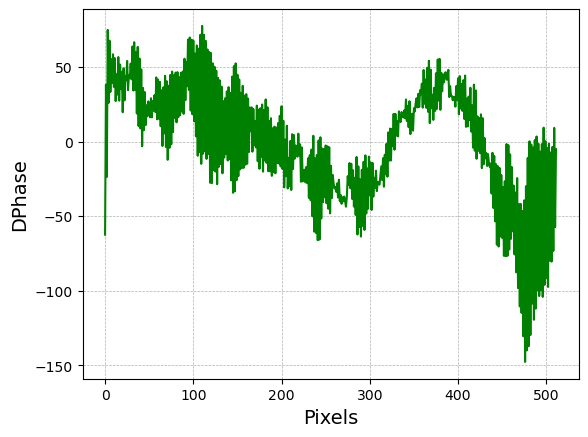

In [17]:
PIPhDith=PI(PhaseDith,0,PhaseDith.shape[0],0,PhaseDith.shape[1])

plt.plot(PIPhDith, '-', color="green")
plt.xlabel("Pixels",fontsize=14)
plt.ylabel("DPhase",fontsize=14)
#plt.ylim(-390,10)
plt.grid(linestyle = '--', linewidth = 0.5)

#np.savetxt(name0+nameS+"/IPCE"+nameG+".txt",ImPCODith)
#np.savetxt(name0+nameS+"/IPCM"+nameG+".txt",ImPCEDith)
#np.savetxt(name0+nameS+"/Abs"+nameG+".txt",AbsDith)
#np.savetxt(name0+nameS+"/PhD"+nameG+".txt",PhaseDDith)
